# Declaring target feature

In [1]:
# target_features = ['GrainYield']
target_features = ['Days2Maturity']

# Importing Libraries

In [2]:
import os
import csv
import numpy as np
import pandas as pd
from copy import copy
from datetime import datetime as dt

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

# Importing data

In [3]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [4]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [5]:
main_path = r'./Data/'
path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final/'
export_path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final_clean/'
plot_path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final_plot/'

# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(plot_path, exist_ok=True)

os.listdir(path)

['Days2Maturity.xlsx', 'GrainYield.xlsx']

In [6]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [7]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
print(len(files_with_address), 'files found in the directory')

2 files found in the directory


# Importing data files to Pandas

In [8]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_excel(data, engine='openpyxl')
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Days2Maturity ===== (1056, 12)
GrainYield ===== (1672, 12)


# Exporting Results

In [9]:
target = '_GY_'
res_df = GrainYield[['Model','Aggregation_method',
                        'Train_field', 'Test_field', 
                        'Training_features', 
                        'RMSE_test', 'RMSE_train',
                        'R2_test', 'R2_train']]


# target = '_DM_'
# res_df = Days2Maturity[['Model','Aggregation_method',
#                         'Train_field', 'Test_field', 
#                         'Training_features', 
#                         'RMSE_test', 'RMSE_train',
#                         'R2_test', 'R2_train']]
# res_df.Model.unique()
res_df.columns

Index(['Model', 'Aggregation_method', 'Train_field', 'Test_field',
       'Training_features', 'RMSE_test', 'RMSE_train', 'R2_test', 'R2_train'],
      dtype='object')

## Scores all_mix

In [10]:
scores = ['R2_test', 'RMSE_test', 'R2_train', 'RMSE_train']

In [13]:
for score in scores:
    # Collecting Simps results
    plot_df_simps = pd.DataFrame()
    counter = 1
    for model in res_df.Model.unique():
        temp_df = res_df[(res_df['Model']==model) &
                             (res_df['Aggregation_method']=='Simpsons') &
    #                          (res_df['Training_features']==feat) &
                         (res_df['Train_field']=='all_mix')]
        temp_df = temp_df[['Model','Aggregation_method',
                    'Train_field', 'Test_field', 
                    'Training_features', 
                    'RMSE_test', 'R2_test',
                    'RMSE_train', 'R2_train']]
        feat_list = temp_df.Training_features.reset_index(drop=True)

    #     plot_df_simps[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)
        plot_df_simps[model] = temp_df[score].reset_index(drop=True)
        counter+=1
    plot_df_simps['Features'] = feat_list
    plot_df_simps['Agg_method'] = 'Simpson\'s rule'

    # # Sort rows based on average score in each row
    # mean_score, idx = zip(*sorted(zip(plot_df_simps.mean(axis=1), [i for i in range(len(plot_df_simps))]), reverse=True))
    # plot_df_simps = plot_df_simps.iloc[list(idx)].reset_index(drop=True)

    # Collecting Trapz results
    plot_df_trapz = pd.DataFrame()
    counter = 1
    feat_list = []
    for model in res_df.Model.unique():
        temp_df = res_df[(res_df['Model']==model) &
                         (res_df['Aggregation_method']=='Trapezoid') &
    #                          (res_df['Training_features']==feat) &
                         (res_df['Train_field']=='all_mix')]
        temp_df = temp_df[['Model','Aggregation_method',
                    'Train_field', 'Test_field', 
                    'Training_features', 
                    'RMSE_test', 'R2_test',
                    'RMSE_train', 'R2_train']]
        feat_list = temp_df.Training_features.reset_index(drop=True)
    #     plot_df_trapz[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)
        plot_df_trapz[model] = temp_df[score].reset_index(drop=True)
        counter+=1
    plot_df_trapz['Features'] = feat_list
    plot_df_trapz['Agg_method'] = 'Composite Trapezoidal Rule'

    # # Sort rows based on average score in each row
    # mean_score, idx = zip(*sorted(zip(plot_df_trapz.mean(axis=1), [i for i in range(len(plot_df_trapz))]), reverse=True))
    # plot_df_trapz = plot_df_trapz.iloc[list(idx)].reset_index(drop=True)

    # Merging df
    df_conct = pd.concat([plot_df_simps, plot_df_trapz]).reset_index(drop=True)
    filename = export_path + 'plot_df_'+score+target+'.xlsx'
    sheet_name = 'plot_df_'+score+target

    # Exporting Results
    df_conct.to_excel(filename,sheet_name = sheet_name, index=False, engine='openpyxl')

# Scores Self 66-33 

In [14]:
self_df = res_df[res_df.Train_field == res_df.Test_field]

In [15]:
for score in scores:
    # Collecting Simps results
    plot_df_simps = pd.DataFrame()
    counter = 1
    for model in self_df.Model.unique():
        temp_df = self_df[(self_df['Model']==model) &
                             (self_df['Aggregation_method']=='Simpsons') &
    #                          (self_df['Training_features']==feat) &
                         (self_df['Train_field']!='all_mix')]
        temp_df = temp_df[['Model','Aggregation_method',
                    'Train_field', 'Test_field', 
                    'Training_features', 
                    'RMSE_test', 'R2_test',
                    'RMSE_train', 'R2_train']]
        feat_list = temp_df.Training_features.reset_index(drop=True)

    #     plot_df_simps[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)

        # ADDING FIELD NAMES AS COLUMN 
        # Checks if the field names are in same sequence in all models
        if counter > 2:
            if sum(temp_df['Train_field'].reset_index(drop=True) == fields_list_temp) == len(fields_list_temp):
                plot_df_simps['Field'] = temp_df['Train_field'].reset_index(drop=True)
            else:
                ERROR
        fields_list_temp = temp_df['Train_field'].reset_index(drop=True).copy()

        plot_df_simps[model] = temp_df[score].reset_index(drop=True)

        counter+=1
    plot_df_simps['Features'] = feat_list
    plot_df_simps['Agg_method'] = 'Simpson\'s rule'

    # # Sort rows based on average score in each row
    # mean_score, idx = zip(*sorted(zip(plot_df_simps.mean(axis=1), [i for i in range(len(plot_df_simps))]), reverse=True))
    # plot_df_simps = plot_df_simps.iloc[list(idx)].reset_index(drop=True)

    # Collecting Trapz results
    plot_df_trapz = pd.DataFrame()
    counter = 1
    feat_list = []
    fields_list_temp = []
    for model in self_df.Model.unique():
        temp_df = self_df[(self_df['Model']==model) &
                         (self_df['Aggregation_method']=='Trapezoid') &
    #                          (self_df['Training_features']==feat) &
                         (self_df['Train_field']!='all_mix')]
        temp_df = temp_df[['Model','Aggregation_method',
                    'Train_field', 'Test_field', 
                    'Training_features', 
                    'RMSE_test', 'R2_test',
                    'RMSE_train', 'R2_train']]
        feat_list = temp_df.Training_features.reset_index(drop=True)
    #     plot_df_trapz[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)

        # ADDING FIELD NAMES AS COLUMN 
        # Checks if the field names are in same sequence in all models
        if counter > 2:
            if sum(temp_df['Train_field'].reset_index(drop=True) == fields_list_temp) == len(fields_list_temp):
                plot_df_trapz['Field'] = temp_df['Train_field'].reset_index(drop=True)
            else:
                ERROR
        fields_list_temp = temp_df['Train_field'].reset_index(drop=True).copy()

        plot_df_trapz[model] = temp_df[score].reset_index(drop=True)
        counter+=1
    plot_df_trapz['Features'] = feat_list
    plot_df_trapz['Agg_method'] = 'Composite Trapezoidal Rule'

    # # Sort rows based on average score in each row
    # mean_score, idx = zip(*sorted(zip(plot_df_trapz.mean(axis=1), [i for i in range(len(plot_df_trapz))]), reverse=True))
    # plot_df_trapz = plot_df_trapz.iloc[list(idx)].reset_index(drop=True)

    # Merging df
    df_conct = pd.concat([plot_df_simps, plot_df_trapz]).reset_index(drop=True)
    filename = export_path + 'self_66-33_'+score+target+'.xlsx'
    sheet_name = 'self_66-33_'+score
    df_conct = df_conct[ [ col for col in df_conct.columns if col != 'Field' ] + ['Field']]


    # Exporting Results
    df_conct.to_excel(filename,sheet_name = sheet_name, index=False, engine='openpyxl')

# Plotting Results

<ipython-input-18-45d86561e3ba>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


<Figure size 1000x700 with 0 Axes>

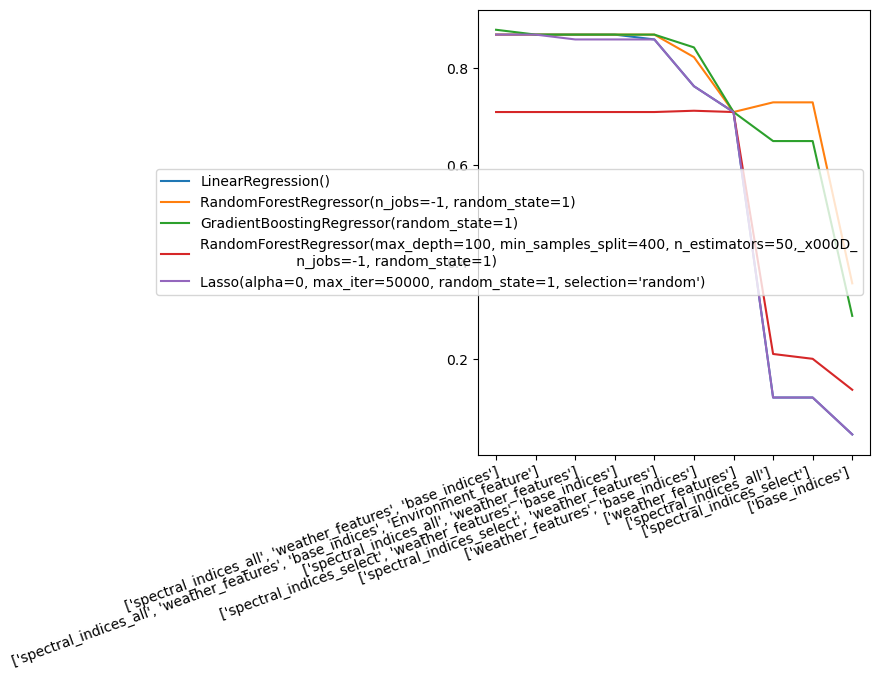

In [18]:
# display(plot_df_simps)
plt.figure(figsize=(10,7))

# ax.set_xticks(range(len(lam_beta)))
# ax.set_xticklabels(lam_beta, rotation='vertical')

import textwrap
mean_length = np.mean([len(i) for i in plot_df_simps.Features])
columns = ["\n".join(textwrap.wrap(i,int(mean_length))) for i in plot_df_simps.Features]
ax = plot_df_simps.plot()

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=30,
                   ha="right",
                   rotation_mode='anchor')
plt.tight_layout()

plt.xticks(np.arange(len(plot_df_simps.Features)), labels=plot_df_simps.Features, rotation=20)

plt.show()


In [166]:


# plot_df_trapz.plot()
# display(plot_df_trapz)
# plt.show()

In [ ]:
res_simp = res_df[res_df.Aggregation_method == 'Simpsons']
res_simp.drop(['Aggregation_method'], axis=1, inplace=True)
res_simp

In [ ]:
plot_res_df = np.array(res_simp.iloc[49:-1,4:])
plot_res_df = plot_res_df.astype(np.float)
plot_res_df

In [45]:
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matrix = plot_res_df

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(matrix.shape[0])]
ypos = [range(matrix.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,  zsort='average')

plt.show()

NameError: name 'plot_res_df' is not defined

# Importing Processed data

In [9]:
plot_path

'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/'

## Creating list of complete files

In [10]:
# Get the list of all files in directory tree at given path

files_with_address_plot = []
files_list_plot = []

for (dirpath, dirnames, filenames) in os.walk(plot_path):
    files_with_address_plot += [os.path.join(dirpath, file) for file in filenames 
                                if file.split('.')[1] == 'csv' or file.split('.')[1] == 'xlsx']
    files_list_plot.extend(filenames)
print(len(files_with_address_plot), 'files found in the directory')
files_with_address_plot

8 files found in the directory


['C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Simps_66-33_R2_test_DM.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Simps_66-33_R2_test_GY.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Simps_all_mix_R2_test_DM.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Simps_all_mix_R2_test_GY.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Trapz_66-33_R2_test_DM.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Trapz_66-33_R2_test_GY.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Trapz_all_mix_R2_test_DM.csv',
 'C:/Users/fahad//MegaSync\\NMBU\\Master Thesis\\WRITING\\RESULTS\\Final_plot/Trapz_all_mix_R2_test_GY.csv']

## Importing data files to Pandas

In [11]:
all_df = []
for data in files_with_address_plot:
    file_name = os.path.splitext(os.path.basename(data))[0]
    file_ext = os.path.splitext(os.path.basename(data))[1]
    if file_ext == '.csv' or file_ext == '.xlsx':
        # Replce all invalid characters in the name
        file_name = file_name.replace(" ", "_")
        file_name = file_name.replace("-", "_")
        file_name = file_name.replace(")", "")
        file_name = file_name.replace("(", "")
        df_name = file_name.replace(".", "")
        # Test: Check if the same date is already present in the current dict key
        if df_name in all_df:
            print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
            raise NameError
        all_df.append(df_name)

        if file_ext == '.csv':
            locals()[df_name] = pd.read_csv(data)
        elif file_ext == '.xlsx':
            locals()[df_name] = pd.read_excel(data, engine='openpyxl')
        
        print(df_name, '====',file_ext,'====', locals()[df_name].shape)
# all_df

Simps_66_33_R2_test_DM ==== .csv ==== (12, 6)
Simps_66_33_R2_test_GY ==== .csv ==== (21, 6)
Simps_all_mix_R2_test_DM ==== .csv ==== (7, 5)
Simps_all_mix_R2_test_GY ==== .csv ==== (7, 5)
Trapz_66_33_R2_test_DM ==== .csv ==== (12, 6)
Trapz_66_33_R2_test_GY ==== .csv ==== (21, 6)
Trapz_all_mix_R2_test_DM ==== .csv ==== (7, 5)
Trapz_all_mix_R2_test_GY ==== .csv ==== (7, 5)


In [12]:
score = 'R2 Score '
data_type = '(test data)'

# plt.style.use('bmh')
# plt.style.use('default')
# plt.style.use('seaborn-dark')
plt.style.use('seaborn-colorblind')
# plt.style.use('classic')

## All_mix Data

### DM

In [42]:
target_label = 'Days to Maturity'

In [45]:
data_df = Simps_all_mix_R2_test_DM.iloc[:,1:].copy()
x_labels = Simps_all_mix_R2_test_DM.iloc[:,0].tolist()
filename = 'Simps_all_mix_R2_test_DM'
method_name = 'Simpson\'s rule'

# data_df = Trapz_all_mix_R2_test_DM.iloc[:,1:].copy()
# x_labels = Trapz_all_mix_R2_test_DM.iloc[:,0].tolist()
# filename = 'Trapz_all_mix_R2_test_DM'
# method_name = 'composite trapezoidal rule'

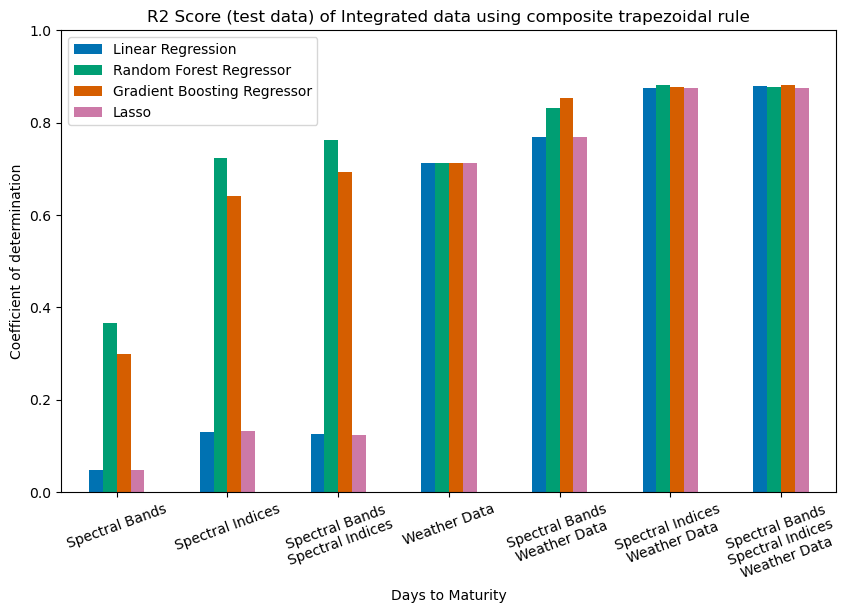

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
data_df.plot.bar(ax=ax, stacked=False, rot=20)
plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
ax.set_ylim(bottom=0, top=1)
ax.set_title(score+data_type+' of Integrated data using '+method_name)
ax.set_xlabel(target_label)
ax.set_ylabel('Coefficient of determination')
# plt.savefig(plot_path+filename+'.jpg', dpi=150, bbox_inches='tight')

plt.show()

### GY

In [13]:
target_label = 'Grain Yield'

In [20]:
data_df = Simps_all_mix_R2_test_GY.iloc[:,1:].copy()
x_labels = Simps_all_mix_R2_test_GY.iloc[:,0].tolist()
filename = 'Simps_all_mix_R2_test_GY'
method_name = 'Simpson\'s rule'

# data_df = Trapz_all_mix_R2_test_GY.iloc[:,1:].copy()
# x_labels = Trapz_all_mix_R2_test_GY.iloc[:,0].tolist()
# filename = 'Trapz_all_mix_R2_test_GY'
# method_name = 'composite trapezoidal rule'

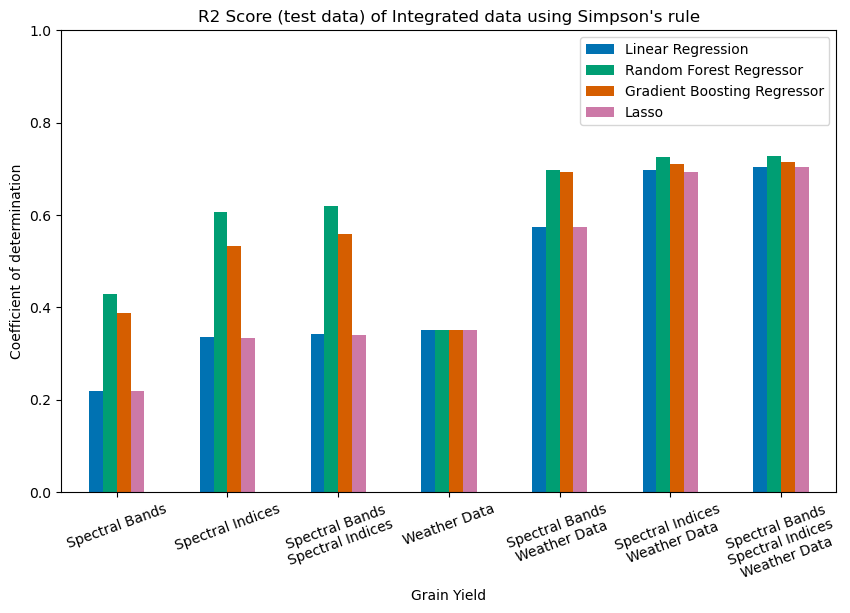

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
data_df.plot.bar(ax=ax, stacked=False, rot=20)
plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
ax.set_ylim(bottom=0, top=1)
ax.set_title(score+data_type+' of Integrated data using '+method_name)
ax.set_xlabel(target_label)
ax.set_ylabel('Coefficient of determination')
# plt.savefig(plot_path+filename+'.jpg', dpi=150, bbox_inches='tight')

plt.show()

## Self 66-33 

### DM

In [60]:
target_label = 'Days to Maturity'

In [65]:
data_df_1 = Simps_66_33_R2_test_DM.copy()
fields = set(Simps_66_33_R2_test_DM.iloc[:,0].tolist())
filename = 'Simps_66_33_R2_test_DM'
method_name = 'Simpson\'s rule'

# data_df_1 = Trapz_66_33_R2_test_DM.copy()
# fields = set(Trapz_66_33_R2_test_DM.iloc[:,0].tolist())
# filename = 'Trapz_66_33_R2_test_DM'
# method_name = 'composite trapezoidal rule'

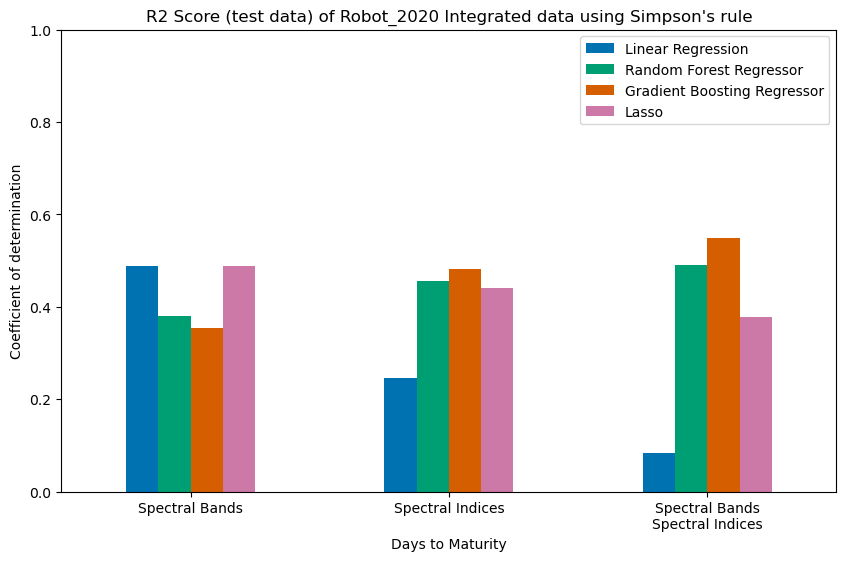

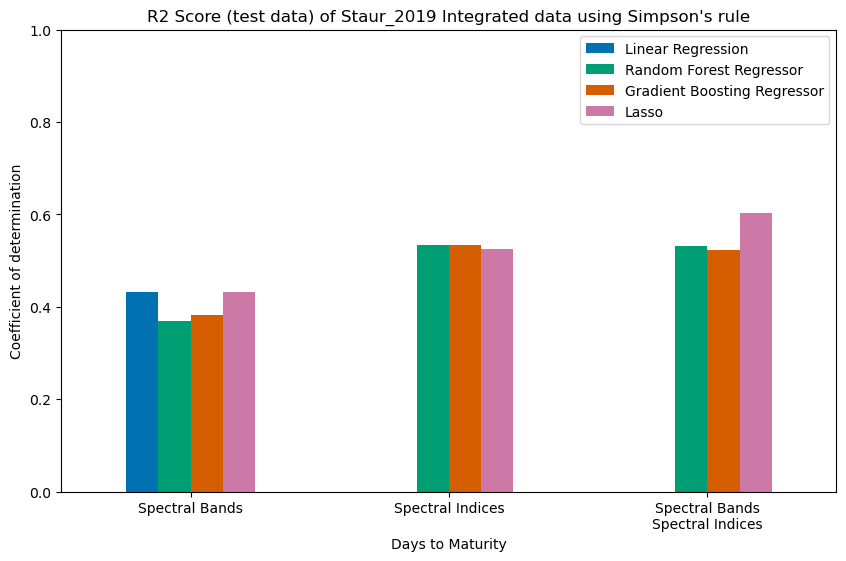

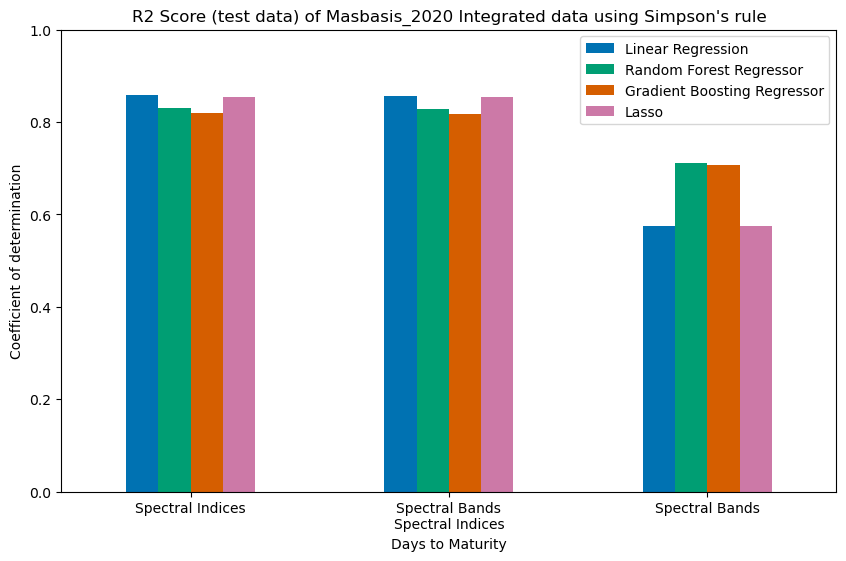

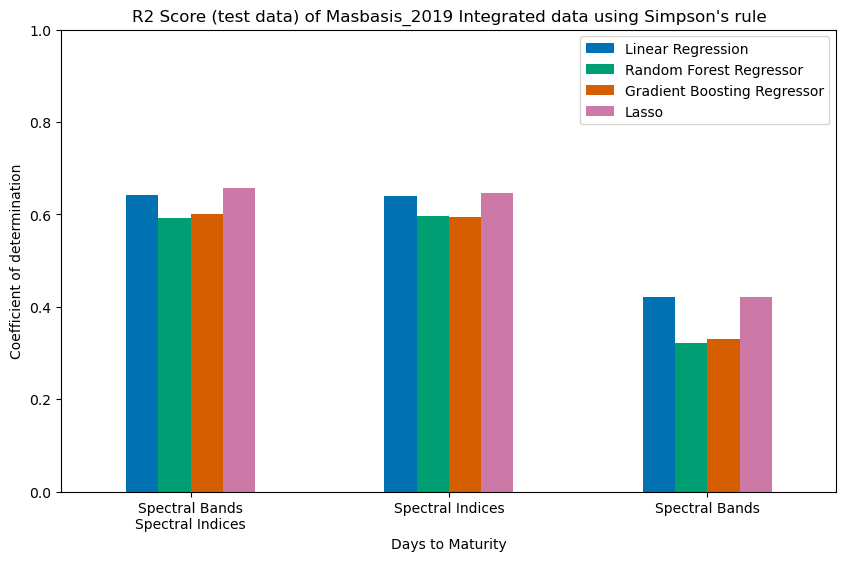

In [66]:
for field in fields:
    temp_df = data_df_1[data_df_1['Field'] == field]
    x_labels = temp_df.iloc[:,1].tolist()
    
    data_df = temp_df.drop(['Features', 'Field'], axis=1).copy()
    fig, ax = plt.subplots(figsize=(10,6))
    temp_df.plot.bar(ax=ax, stacked=False, rot=0)
    plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
    ax.set_ylim(bottom=0, top=1)
    ax.set_title(score+data_type+' of '+field[:-6]+' Integrated data using '+method_name)
    ax.set_xlabel(target_label)
    ax.set_ylabel('Coefficient of determination')
#     plt.savefig(plot_path+filename+'_'+field[:-6]+'.jpg', dpi=150, bbox_inches='tight')

    plt.show()

### GY

In [53]:
target_label = 'Grain Yield'

In [70]:

data_df_2 = Simps_66_33_R2_test_GY.copy()
fields = set(Simps_66_33_R2_test_GY.iloc[:,0].tolist())
filename = 'Simps_66_33_R2_test_GY'
method_name = 'Simpson\'s rule'

data_df_2 = Trapz_66_33_R2_test_GY.copy()
fields = set(Trapz_66_33_R2_test_GY.iloc[:,0].tolist())
filename = 'Trapz_66_33_R2_test_GY'
method_name = 'composite trapezoidal rule'

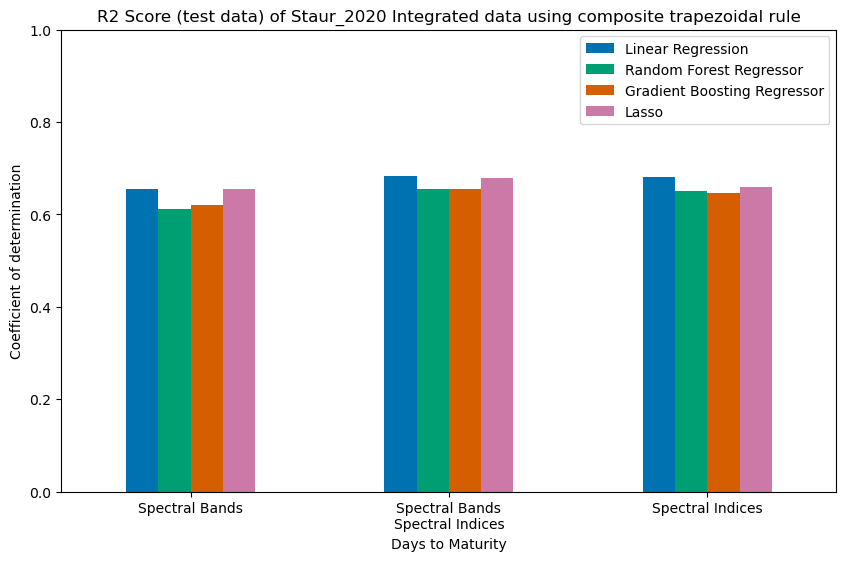

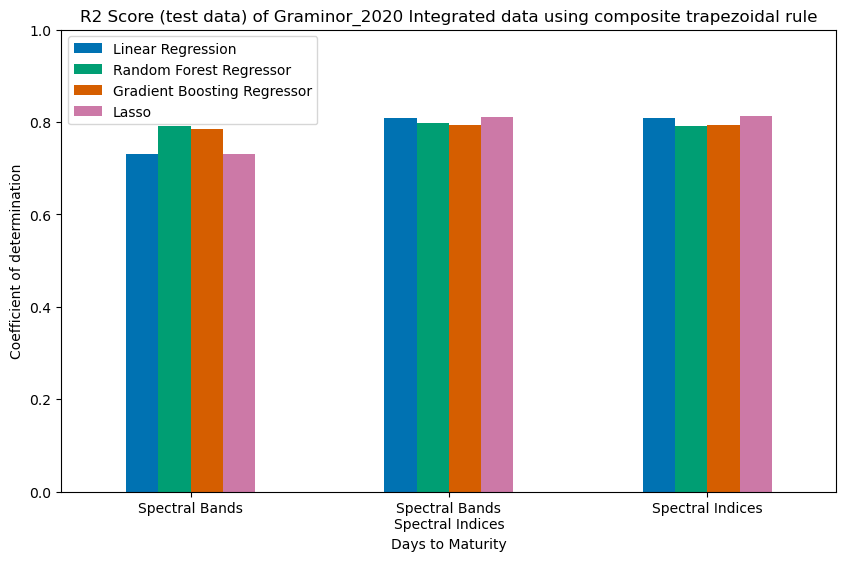

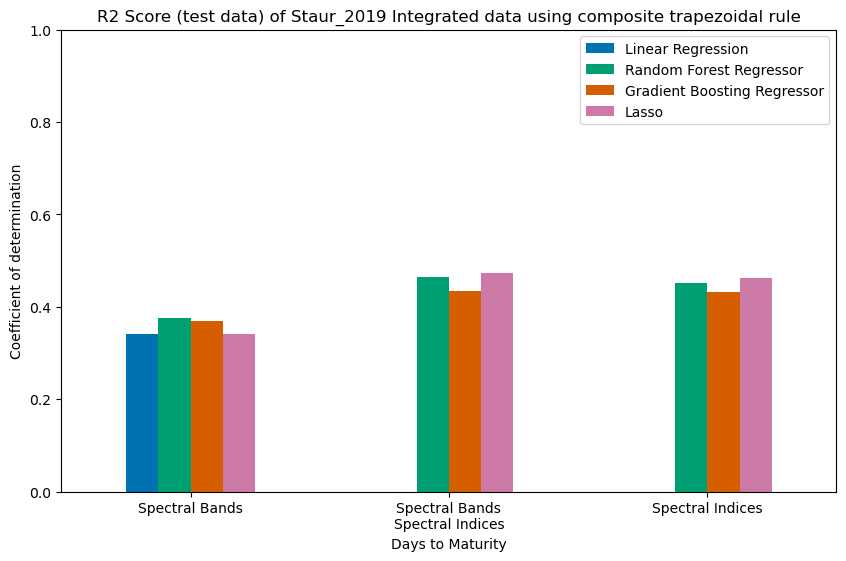

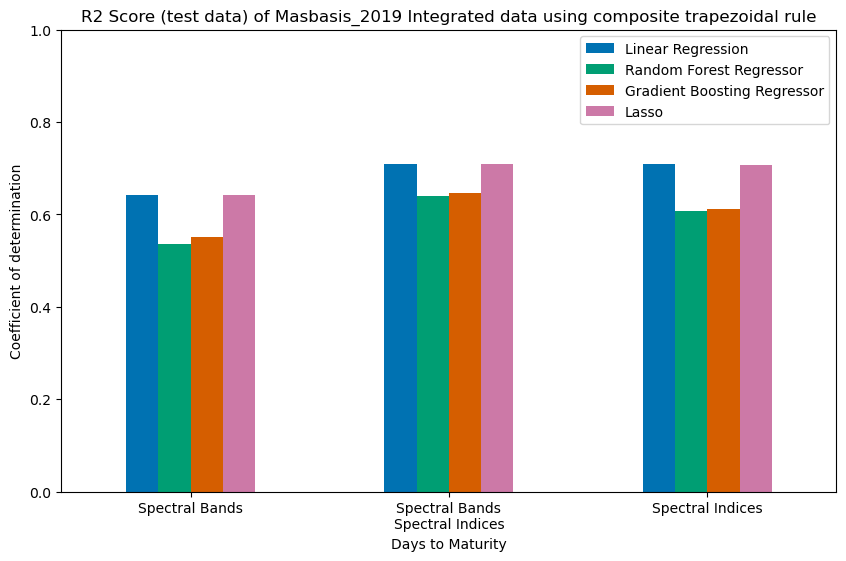

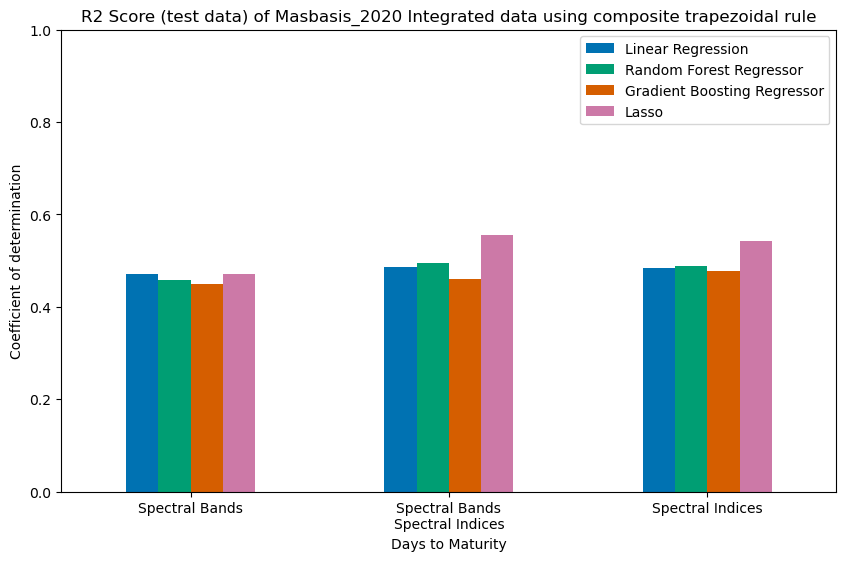

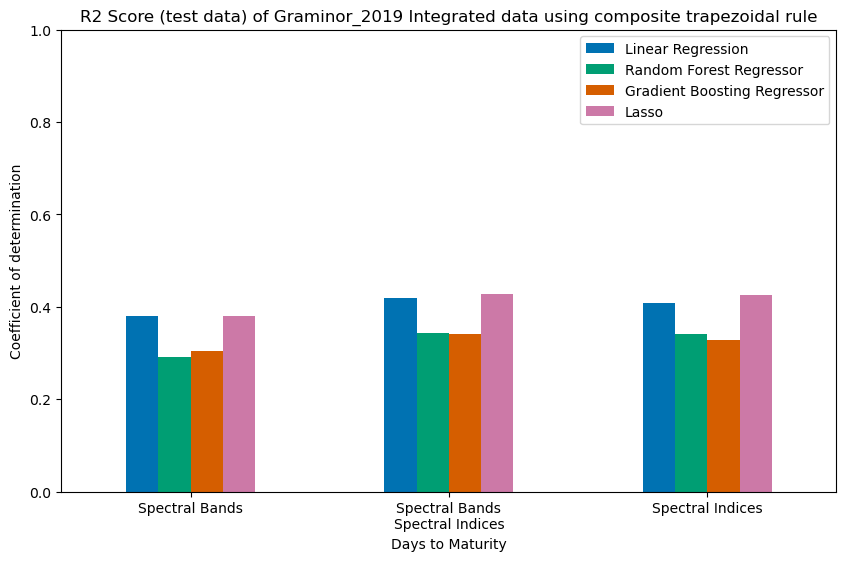

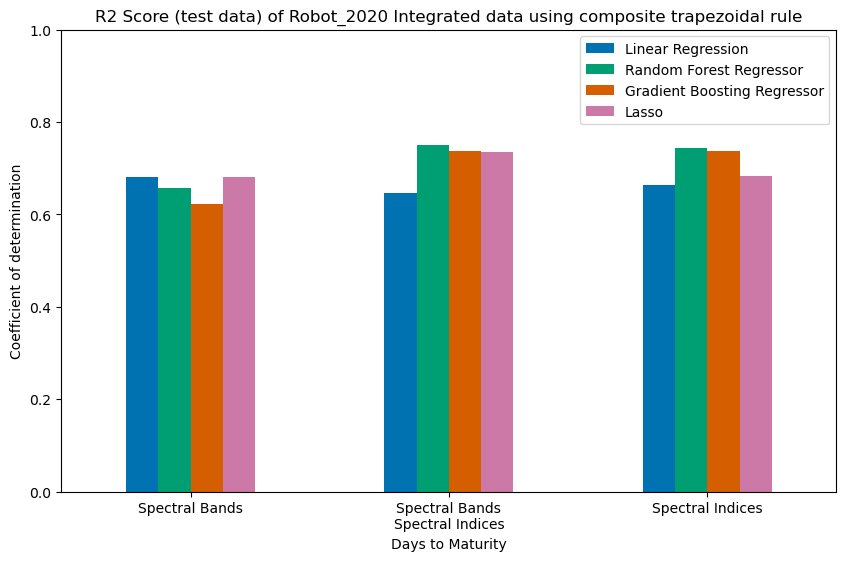

In [71]:
for field in fields:
    temp_df = data_df_2[data_df_2['Field'] == field]
    x_labels = temp_df.iloc[:,1].tolist()
    
    data_df = temp_df.drop(['Features', 'Field'], axis=1).copy()
    fig, ax = plt.subplots(figsize=(10,6))
    temp_df.plot.bar(ax=ax, stacked=False, rot=0)
    plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
    ax.set_ylim(bottom=0, top=1)
    ax.set_title(score+data_type+' of '+field[:-6]+' Integrated data using '+method_name)
    ax.set_xlabel(target_label)
    ax.set_ylabel('Coefficient of determination')
#     plt.savefig(plot_path+filename+'_'+field[:-6]+'.jpg', dpi=150, bbox_inches='tight')

    plt.show()

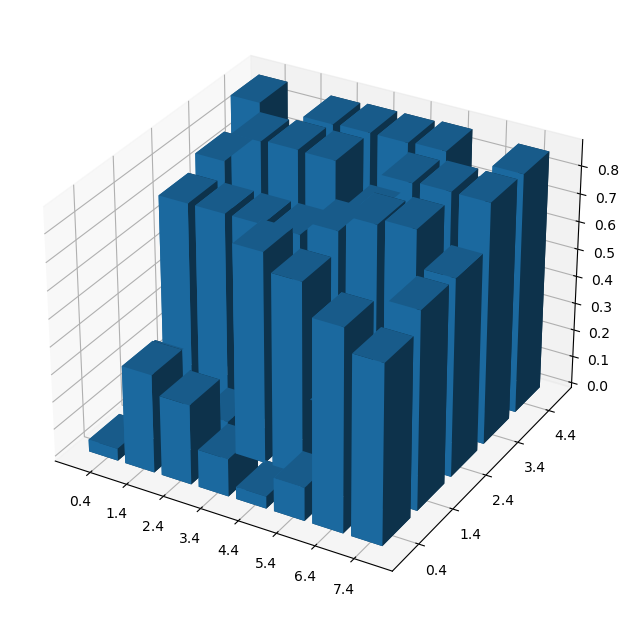

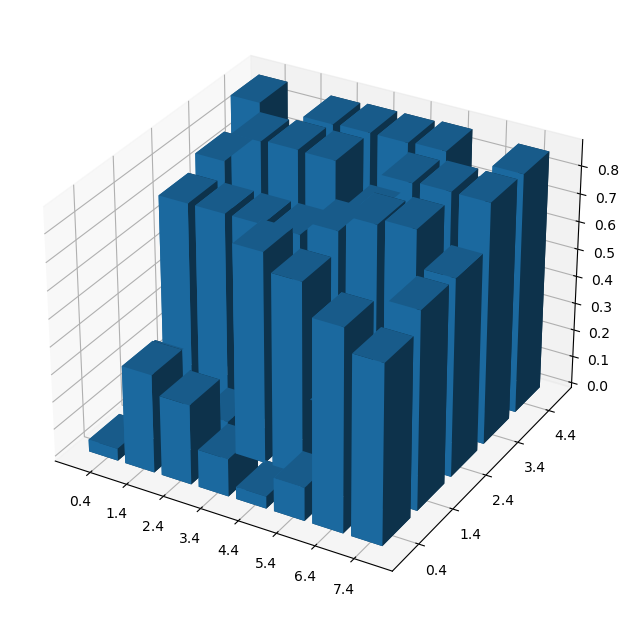

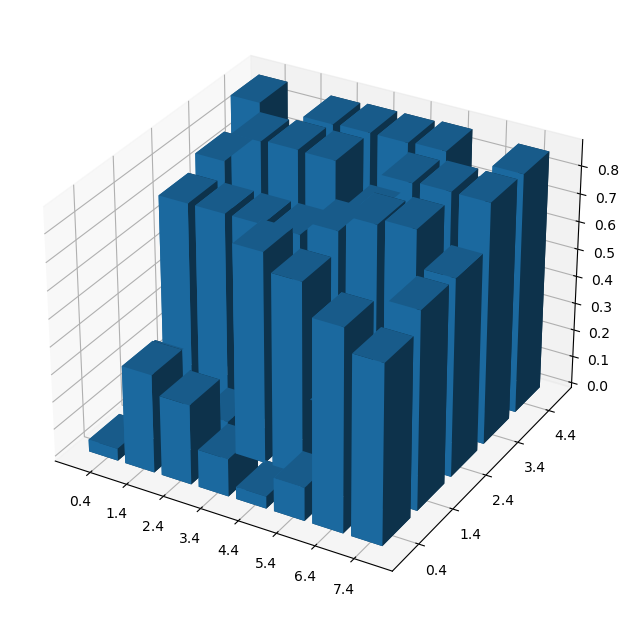

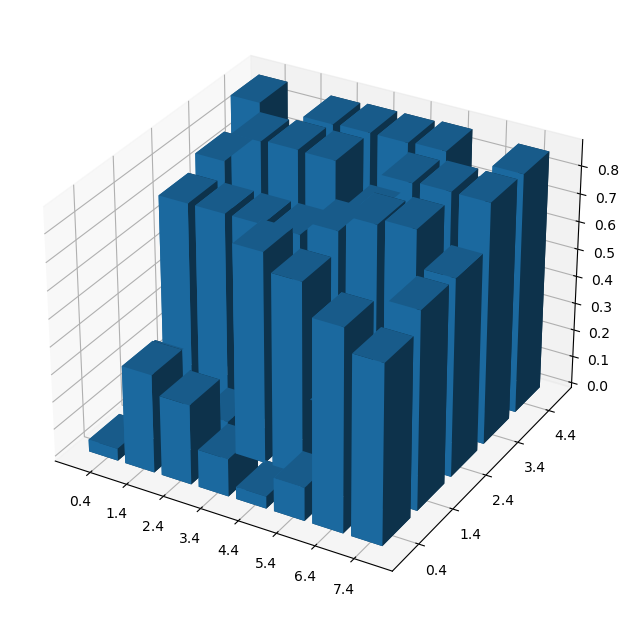

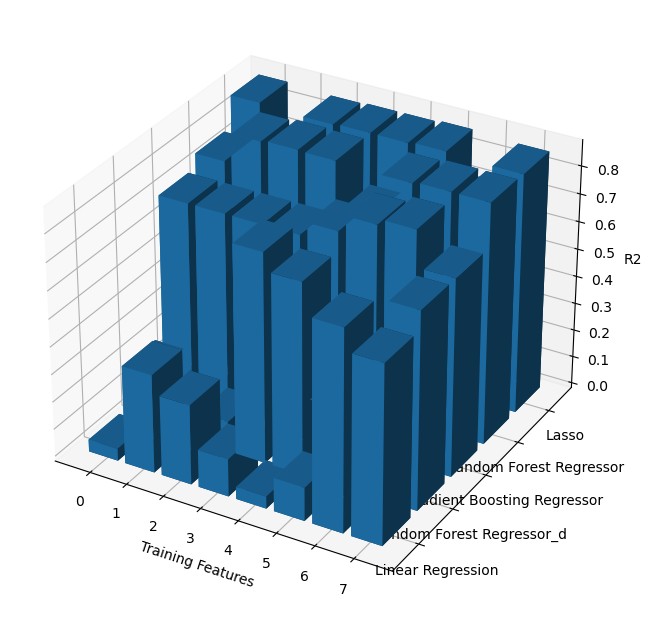

In [68]:
from mpl_toolkits.mplot3d import Axes3D

data_df = Simps_R2_test.iloc[:,1:].copy()
# thickness of the bars
dx, dy = .8, .8

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(data_df.shape[0])
ypos=np.arange(data_df.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(data_df.shape).flatten()

# the bars' heights
dz = data_df.values.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# put the column / index labels
ax.w_yaxis.set_ticklabels(data_df.columns)
ax.w_xaxis.set_ticklabels(data_df.index)

# name the axes
ax.set_xlabel('Training Features')
# ax.set_ylabel('Models')
ax.set_zlabel('R2')

plt.show()

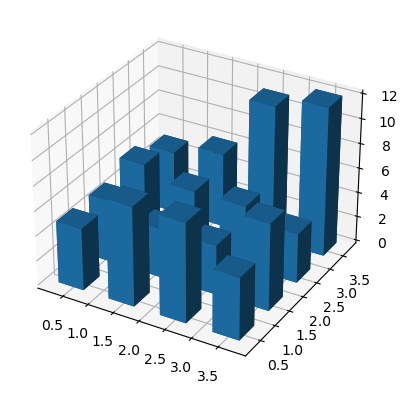

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [85]:
y

array([3.1369191 , 1.58819015, 0.61858733, 2.88477299, 3.34732362,
       3.75142081, 2.30685528, 0.78010624, 0.47117588, 3.80240082,
       1.13468921, 3.82624969, 3.63770185, 1.31370075, 3.80706227,
       0.4652859 , 3.4972566 , 3.94090187, 3.00134152, 3.94062586,
       3.96072094, 0.24390837, 0.01494392, 3.25001285, 2.33094688,
       0.60098393, 0.60869423, 2.10823801, 1.91762079, 0.36875975,
       2.04782973, 0.17132442, 3.22518462, 0.96879466, 3.39284439,
       2.78235943, 1.44530746, 2.02280576, 1.17668969, 2.64033828,
       2.13654141, 0.77926424, 3.44762272, 3.91211558, 3.5287465 ,
       2.10943668, 0.88563616, 0.81088986, 0.30222999, 3.81027195,
       3.51667163, 3.59769305, 0.26198273, 1.39670786, 1.93515312,
       3.02811047, 0.22710621, 0.91604907, 2.51708129, 1.15530884,
       3.98086084, 1.67240682, 3.94040032, 3.04979149, 0.22209944,
       1.27081141, 3.87104853, 0.239195  , 0.03206925, 2.33695948,
       2.60213666, 3.24638583, 1.73975863, 2.82964713, 2.33831

In [86]:
hist

array([[ 5.,  5.,  6.,  5.],
       [ 8.,  4.,  5.,  6.],
       [ 8.,  4.,  5., 11.],
       [ 5.,  7.,  4., 12.]])